## 折れ線グラフ:参考

[matplotlib.pyplot.plot](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib-pyplot-plot)

[matplotlib.pyplot.errorbar](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.errorbar.html)

[matplotlib で折れ線グラフを描く](https://pythondatascience.plavox.info/matplotlib/%E6%8A%98%E3%82%8C%E7%B7%9A%E3%82%B0%E3%83%A9%E3%83%95)

In [1]:
import openpyxl

wb = openpyxl.load_workbook('図表作成用ファイル.xlsx')
sheet = wb['折れ線グラフ']

name1 = sheet['A2'].value[1:-1]
name2 = sheet['A3'].value[1:-1]

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = [cell.value for cell in list(sheet['B1:F1'][0])]
range1 = sheet['B2:K3']
range2 = sheet['B6:K7']

In [4]:
def plot_signal(x, range_n, fig_):
    values = [cell.value for cell in np.array(range_n).flatten()]
    x_position = np.arange(len(x))
    y1 = values[:5]
    y1_err = values[5:10]
    y2 = values[10:15]
    y2_err = values[15:20]
    sum1_y_yerr = [(y+yerr)*1.03 for y, yerr in zip(y1, y1_err)]
    sum2_y_yerr = [(y+yerr)*1.03 for y, yerr in zip(y2, y2_err)]
    
    ax = fig_.add_subplot(1, 1, 1)
    ax.errorbar(x_position, y1, fmt='-o', label=name1, 
           color='#09610a', yerr=y1_err, capsize=5)
    ax.errorbar(x_position, y2, fmt='--o', label=name2,
           color='#404040', yerr=y2_err, capsize=5)
    max_ = 0
    for x_, y1_, y2_ in zip(x_position, sum1_y_yerr, sum2_y_yerr):
        ax.text(x_, max(y1_, y2_), 'ns', ha='center', fontsize=16)
        max_ = max(max_, max(y1_, y2_))
    ax.set_ylim(bottom=0, top=max_*1.2)
    ax.set_xlabel('Days after sowing', fontsize=18)
    ax.set_ylabel('Total root length (cm ${plant}^{-1}$)', fontsize=18)
    ax.legend()
    ax.set_xticks(x_position)
    ax.set_xticklabels(x)
    ax.tick_params(labelsize=14)
    return fig_

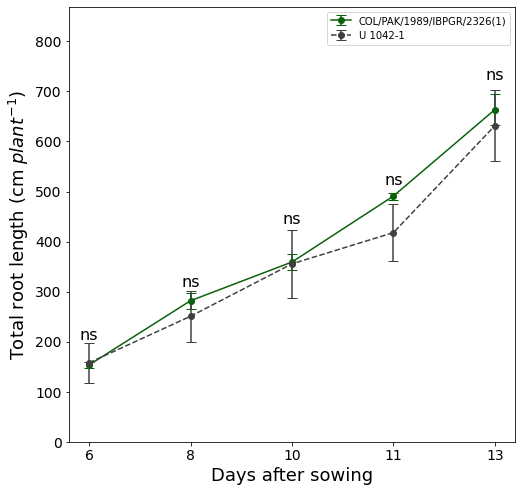

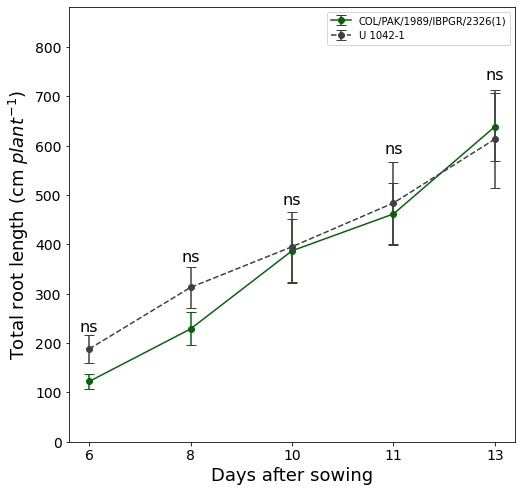

In [5]:
for range_ in [range1, range2]:
    fig = plt.figure(figsize=(8,8))
    fig = plot_signal(x, range_, fig_=fig)
    fig